# Análise de dados das ocorrências do Coronavírus

In [28]:
#Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (11,7)

In [29]:
base = pd.read_csv('csv/covid_19_data.csv')
base

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
3079,3080,03/02/2020,"Umatilla, OR",US,2020-03-02T20:23:16,1.0,0.0,0.0
3080,3081,03/02/2020,From Diamond Princess,Australia,2020-02-29T02:03:10,0.0,0.0,0.0
3081,3082,03/02/2020,"Lackland, TX (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0
3082,3083,03/02/2020,"Omaha, NE (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0


In [30]:
base_confirmed = pd.read_csv('csv/time_series_covid_19_confirmed.csv')
base_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,Anhui,Mainland China,31.82571,117.2264,1,9,15,39,60,70,...,860,889,910,934,950,962,973,982,986,987
1,Beijing,Mainland China,40.18238,116.4142,14,22,36,41,68,80,...,342,352,366,372,375,380,381,387,393,395
2,Chongqing,Mainland China,30.05718,107.8740,6,9,27,57,75,110,...,505,518,529,537,544,551,553,555,560,567
3,Fujian,Mainland China,26.07783,117.9895,1,5,10,18,35,59,...,267,272,279,281,285,287,290,292,293,293
4,Gansu,Mainland China,36.06110,103.8343,0,2,2,4,7,14,...,86,87,90,90,90,90,91,91,91,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Diamond Princess cruise ship,Others,35.44370,139.6380,0,0,0,0,0,0,...,135,175,175,218,285,355,454,542,621,634
72,"San Diego County, CA",US,32.71570,-117.1611,0,0,0,0,0,0,...,1,1,2,2,2,2,2,2,2,2
73,"San Antonio, TX",US,29.42410,-98.4936,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1
74,NaN,Egypt,26.82060,30.8025,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1


## Estatística Descritiva

In [31]:
#Descrição dos dados com a quantidade, a média, os quartis, desvo padrão, mínimo e máximo.
base.describe()

,SNo,Confirmed,Deaths,Recovered
count,3084.000000,3084.000000,3084.000000,3084.000000
mean,1542.500000,612.572633,17.466926,152.385214
std,890.418441,5092.995803,182.555887,1446.430660
min,1.000000,0.000000,0.000000,0.000000
25%,771.750000,2.000000,0.000000,0.000000
50%,1542.500000,10.000000,0.000000,1.000000
75%,2313.250000,121.000000,1.000000,18.000000
max,3084.000000,67103.000000,2803.000000,33934.000000


In [33]:
# Quantidade de casos mortes por país/região

base.groupby(['Country/Region'])['Deaths'].sum()

Country/Region
 Azerbaijan             0.0
Afghanistan             0.0
Algeria                 0.0
Andorra                 0.0
Armenia                 0.0
                       ... 
Thailand                2.0
UK                      0.0
US                      8.0
United Arab Emirates    0.0
Vietnam                 0.0
Name: Deaths, Length: 79, dtype: float64

## Gráfico de Confirmados, Recuperados e Mortes

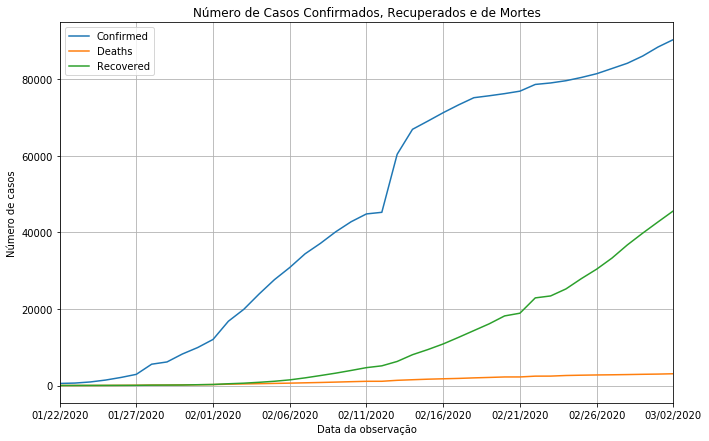

In [34]:
# Gráfico do Número de Casos Confirmados, Recuperados e de Mortes pela data de observação, todas as regiões foram somadas.

base.groupby(['ObservationDate'])['Confirmed'].sum().plot()
base.groupby(['ObservationDate'])['Deaths'].sum().plot()
base.groupby(['ObservationDate'])['Recovered'].sum().plot()
plt.title("Número de Casos Confirmados, Recuperados e de Mortes")
plt.xlabel("Data da observação")
plt.ylabel("Número de casos")
plt.legend()
plt.grid(True)